In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# Thinkful Data Science Prep Capstone

## U.S. Net Foreign Investment And The Subprime Lending Crisis

- - - -


#### Submitted By: AJ Igherighe   |   Completion Date: January 25, 2018

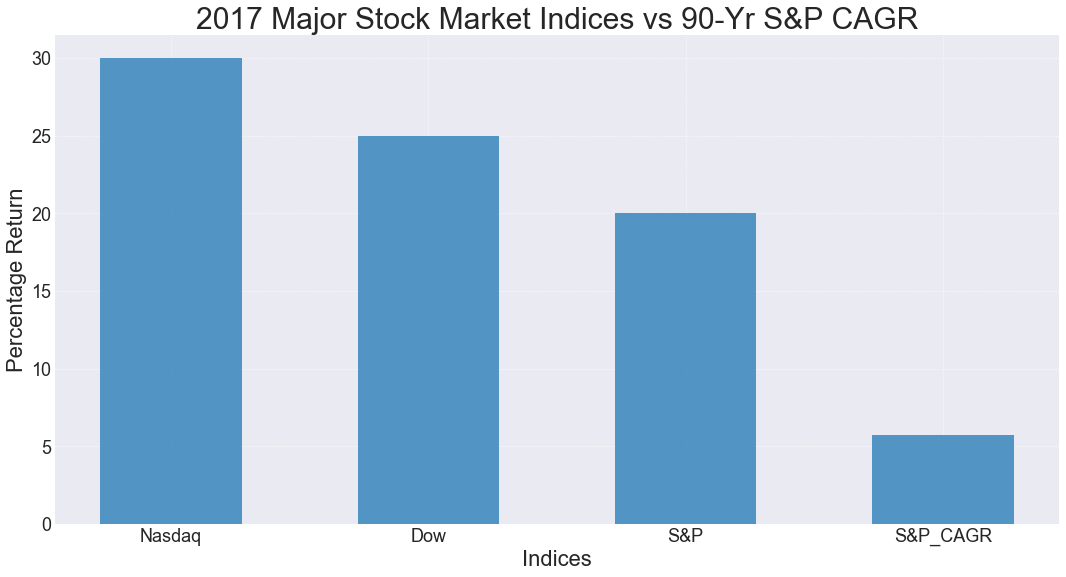

In [2]:
def create_barchart(data, values_column, xlabel, ylabel, title):
    """plot provided data into a bar chart"""
    fig = plt.figure(figsize=(18, 9))
    values = list(data[values_column])
    objects = (data.index)
    y_pos = np.arange(len(objects))
    bar_width = 0.55
    plt.bar(y_pos, values, bar_width, align='center', alpha=0.75)
    plt.xticks(y_pos, objects, size=18)
    plt.yticks(size=18)
    plt.xlabel(xlabel).set_size(22)
    plt.ylabel(ylabel).set_size(22)
    plt.title(title).set_size(30)
    plt.grid(linestyle='dotted')
    plt.show()

# prepare data for chart
# calclate historical S&P 500 compounded annual return (CAGR)
historical_returns_xl = pd.ExcelFile('./Data/historicalmarketreturns.xls')
sheetnames = list(historical_returns_xl.sheet_names)
sp_data = historical_returns_xl.parse(str(sheetnames[2]))

# clean up data
# delete unnecessary columns
sp_cols = sp_data.columns
sp_data.drop(sp_data.columns[[4, 5]], axis=1, inplace=True)

# insert new column adding dividend value to S&P value
new_col = 'S&P_Full'
sp_data['S&P_Full'] = sp_data['S&P 500'] + sp_data['Dividends']

# create the long term historical compounded annual growth rate (CAGR) for the S&P 500
years = int(len(sp_data[new_col][:]) - 1)
sp_start = float(sp_data[new_col][:1].copy(deep=True))
sp_end = float(sp_data[new_col][-1:].copy(deep=True))
total_return = sp_end / sp_start
cagr = (total_return ** (1 / years)) - 1
cagr_per = cagr * 100

# 2017 stock market gains from cnn money and CAGR calculated from NYU data
stock_gains = {
    # dictionary with 2017 stock market index data
    'Index': ['Nasdaq', 'Dow', 'S&P', 'S&P_CAGR'], 
    'Returns': [30, 25, 20, cagr_per]
}

# create and sort dataframe from dictionary
df_gains = pd.DataFrame.from_dict(stock_gains)
df_gains.set_index(keys='Index', inplace=True)

# create chart using barchart function
xlabel = 'Indices'
ylabel = 'Percentage Return'
graph_title = '2017 Major Stock Market Indices vs 90-Yr S&P CAGR'
data_column = 'Returns'

# run function to create bar graph
sns.set_style('dark')
create_barchart(df_gains, data_column, xlabel, ylabel, graph_title)

**Figure 1: 2017 Returns By Major US Indices**

## Background

The United States is in the midst of an usually favorable economic period.  This is evidenced, in part, by the stock market experiencing its second longest bull market in recorded history.  U.S. major index returns in 2017 further support this point. To put this in perspective, Figure 1 compares 2017 returns of the major U.S. indexes to the S&P 500's compounded annual return since 1927.  Not only did the Nasdaq exceed this historical benchmark by nearly 6x, but the S&P itself earned a nearly 4x greater return than we would expect from its own historical performance. [1](http://money.cnn.com/2018/01/02/investing/stock-market-2018-outlook/index.html) [2](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)

  Preliminary research suggest the reasons for these gains are obvious:  
* **Lower Market Capitalizations Following The Great Recession**.  Triggered by what is now commonly called the "Subprime Mortgage Crisis," which arguably started with the bankruptcy of New Century in April 2007 [3](https://www.federalreservehistory.org/essays/subprime_mortgage_crisis), the US economy experienced its greatest retraction since the Great Depression.  In turn, the stock market experienced significant declines. As an example, the Dow Jones Industrial Average, a composite of the 30 largest public companies by market capitalization and considered by many investors as the least volatile stocks, lost 50% of its value between October 8, 2007 and March 5, 2009.  However, the United States was not affected alone.  Some experts estimate stock market losses worldwide from the crisis and subsequent recession could be nearly 10 trillion USD. [4](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp)

>> "Dozens of mortgage lenders declare bankruptcy in a matter of weeks. The market is filled with concerns of a major global credit crunch, which could affect all classes of borrowers. Central banks use emergency clauses to inject liquidity into scared financial markets. The real estate markets plummet after years of record highs. Foreclosure rates double year-over-year during the latter half of 2006 and in 2007." [5](https://www.investopedia.com/articles/07/subprime-overview.asp#ixzz54wBqEgCY)

* **A Massive Global Bailout, Stimulus, And Cheap Capital**.  Many argue with the actions taken to help institutions and homeowners during and following the subprime crisis.  However, Ryan Barnes' quote above (from an Investopedia article) paints a clear picture of how dire the situation appeared at the time.  Essentially, as markets panicked, concern emerged that, left unchecked, the subprime mortgage issue could spark a self-reinforcing liquidity crisis that could end in several key bankrupt financial institutions, and possibly even some governments.  By the time Lehman Brothers filed bankruptcy in Fall 2008 [4](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp), the US government, arguably, had little choice but to take several decisive actions:
  * Seize Fannie Mae and Freddie Mac to prevent their failure and to reassure the mortgage lending markets.  
  
  * Present programs to encourage banks to re-configure loans for deliquent borrowers and those with mortgages exceed their current home values rather than rush to foreclose.  
  
  * Lower short-term interest rates effectively to 0% to encourage banks to borrow and inject liquidity into the market.  
  
  * Purchase mortgage-backed securities and long-term bonds allowing troubled insitutions to strengthen their balance sheets, infusing liquidity into the market directly, and encouraging other financial institutions to provide additional liquidity by reducing longer-term interest rates. [3](https://www.federalreservehistory.org/essays/subprime_mortgage_crisis)  

Now, that it appears the US, and many other nations (see supplemental section), have recovered from The Great Recession [6](https://www.cbpp.org/research/economy/chart-book-the-legacy-of-the-great-recession) and that the U.S., Britain, and several other developed nations appear to be going through a nationalist backlash to globalization (the latter is based on the election of Donald Trump, "Brexit", and other events outside the scope of this analysis), it raises interesting questions about the past, present, and future of foreign investment in the United States.  Specifically:

   

  **What have U.S. net foreign investment trends been historically?**
 
  **Did the Subprime Crisis impact these historical trends?**  

  **Can we identify a key driver of any net foreign investment changes pre-and-post crisis?**  



- - - -

## Following The Provided Capstone Methodology

To meet the requirements outlined in Unit 4 | Lesson 2 | Project 2, this *Analytic Report and Research Proposal* will follow these steps:

* **Describe the selected dataset**.  This analysis is conducted on U.S. Net Foreign Investment Data from the U.S. Department of Commerce's Bureau of Economic Analysis. [7](https://www.bea.gov/international/bp_web/tb_download_type_modern.cfm?list=2&RowID=144)


* **Ask and answer a set of analytical questions**. To the extent the data allows, we will address the three questions outlined at the end of the previous section.


* **Propose further research**. Finally, based on findings from the conducted analysis, the conclusion will contain ideas for additional exploration with skills and techniques from Thinkful's full bootcamp.

- - - -

## Exploring U.S. Net Investment Dataset

For this analysis, we are using data provided from the U.S. Department of Commerce's Bureau of Economic Analysis.  The data contains end of period information from 1976 to 2016 by year and by quarter (quarterly information started in 2006).  We downloaded the data in both its .xls or .csv formats.

For simplicity and speed, our preference was to work with the .csv formatted data.  However, after multiple failed attempts, we were forced to use the .xls formated data.  A review of the spreadsheet quickly showed the problem.  To incorporate both annual and quarterly data in the same file, both the .csv and .xls had unusual formatting likely as a result of converting directly from Microsoft Excel.  After removing the number of unnecessary leading columns and header rows, we were able to convert this to a "clean" .csv file that Pandas successfully imported.  Now, we are able to review our data a little deeper.

In [3]:
def create_dataframe(csv_file):
    """read a supplied csv file and returns a pandas dataframe"""
    try:
        data = pd.read_csv(csv_file)
        return data.copy()
    except:
        print('Error reading csv file into dataframe.')

file = './Data/annual_invest_data.csv'
data_start = create_dataframe(file)
print(data_start.iloc[:, :4].head(3))
print('\n')
print(list(data_start.columns))
print('\n')
print('Cell data is type {}'.format(type(data_start['1980'][0])))

  Line                                 Type of investment   1976  1977 
0    1  U.S. net international investment position (li...  80539  98585
1    2      Net international investment position excl...  80539  98585
2    3      Financial derivatives other than reserves,...   n.a.   n.a.


['Line', 'Type of investment', '1976', '1977\xa0', '1978', '1979\xa0', '1980', '1981\xa0', '1982', '1983\xa0', '1984', '1985\xa0', '1986', '1987\xa0', '1988', '1989\xa0', '1990', '1991\xa0', '1992', '1993\xa0', '1994', '1995\xa0', '1996', '1997\xa0', '1998', '1999\xa0', '2000', '2001\xa0', '2002', '2003\xa0', '2004', '2005\xa0', '2006', '2007\xa0', '2008', '2009\xa0', '2010', '2011\xa0', '2012', '2013\xa0', '2014', '2015\xa0', '2016']


Cell data is type <class 'str'>


An initial review shows:

* An unnecessary former index (column "Line")
* Some header columns contain "junk" text
* We should set the "Type of investments" column as the new index
* The header columns are formated as strings instead of dates we will convert them to integers representing end of each year for our analysis
* We only need a few of the rows in the dataframe to answer the questions and, likely, removing unneeded rows will speed up the analysis
* Finally, the underlying cell data is formatted as text which would make performing calculations impossible.

So, before we can conduct any analysis we need to first validate the data and make it usable for our purposes.

In [7]:
# functions to clean data
def clean_columns(data, remove_column_text):
    """return clean columns"""
    columns = list(data.columns)
    new_columns = []
    for column in columns:
        # replace unwanted text with empty space
        new_column = column.replace(remove_column_text, '')
        new_columns.append(new_column)
    return new_columns

def convert_cols(data, new_type):
    """converts columns to new type"""
    data_tmp = data.copy(deep=True)
    columns_list = list(data_tmp.columns)
    new_columns = []
    for col in columns_list:
        new_columns.append(int(col))
    data_tmp.columns = new_columns
    data_clean_date = data_tmp.copy(deep=True)
    del data_tmp
    return data_clean_date
    
def change_to_int(data, new_type):
    """converts row data from current format to desired format"""
    # copy original data to prevent data corruption of mutable dataframes
    data_tmp = data.copy(deep=True)
    data_names = list(data.index)
    for name in data_names:
        data_tmp.loc[name] = data.loc[name].astype(new_type)
        type(data_tmp.loc[name])
    data_new = data_tmp.copy(deep=True)
    del data_tmp
    return data_new

def clean_data(data, remove_col_num, new_index, remove_from_columns, col_type):
    """performs the actions to save and return a clean dataframe for analysis"""
    # step 1: copy original data to prevent data corruption of mutable dataframes
    data_tmp = data.copy(deep=True)
    # step 2: delete unnecessary index column
    data_tmp.drop(data_start.columns[[remove_col_num]], axis=1, inplace=True)
    # step 3: set new index
    data_tmp.set_index(new_index, inplace=True)
    # step 4: remove junk text from column names
    replacement_columns = clean_columns(data_tmp, remove_from_columns)
    data_tmp.columns = replacement_columns
    # step 5: convert cleaned string columns to int format
    data_tmp = convert_cols(data_tmp, col_type)
    # step 6: return a final copy of the cleaned dataframe
    data_clean1 = data_tmp.copy(deep=True)
    del data_tmp
    return data_clean1

In [8]:
drop_column_number = 0
remove_from_columns = '\xa0'
column_type = int
ind = 'Type of investment'
period_frequency = 'A' # the dataset is for the end of each year
data_clean = clean_data(data_start, drop_column_number, ind, remove_from_columns, column_type)
data_clean.head(3)

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Type of investment,,,,,,,,,,,,,,,,,,,,,
U.S. net international investment position (line 4 less line 35),80539,98585,128273,232250,296862,226992,238366,261494,140140,104281,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
Net international investment position excluding financial derivatives (line 5 less line 36),80539,98585,128273,232250,296862,226992,238366,261494,140140,104281,...,-1350965,-4154938,-2753961,-2622170,-4541036,-4576076,-5450211,-7065777,-7549793,-8379684
"Financial derivatives other than reserves, net (line 6 less line 37)",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,71472,159635,126335,110382,86039,57776,77557,85532,56314,61306


The data is already looking much better.  Now, we will select the desired rows from the data and conver the cells within those rows to integers.  To answer the questions, we need summary data.  Specifically:

* A summary of total U.S. net foreign investment
* A summary of U.S. net foreign investment assets
* A summary of U.S. net foreign investment liabilities

In [9]:
clean_index = list(data_clean.index)
for ind, val in enumerate(clean_index):
    print(ind, val)

0 U.S. net international investment position (line 4 less line 35)
1     Net international investment position excluding financial derivatives (line 5 less line 36)
2     Financial derivatives other than reserves, net (line 6 less line 37)
3   U.S. assets
4       Assets excluding financial derivatives (sum of lines 7, 10, 21, and 26)
5       Financial derivatives other than reserves, gross positive fair value (line 15)
6     By functional category:
7       Direct investment at market value
8         Equity
9         Debt instruments
10       Portfolio investment
11         Equity and investment fund shares
12         Debt securities
13           Short term
14           Long term
15       Financial derivatives other than reserves, gross positive fair value
16         Over-the-counter contracts
17           Single-currency interest rate contracts
18           Foreign exchange contracts
19           Other contracts
20         Exchange-traded contracts
21       Other investment
22         

The above output shows the data required for the analysis is at rows 0, 3, and 35.  We can create a new dataframe of just these rows and then convert the cell data to integers to start the analysis.

In [10]:
data_desired = data_clean.iloc[[0, 3, 35]].copy(deep=True)
new_type = int
data_clean_desired = change_to_int(data_desired, new_type)
data_clean_desired.head(3)

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Type of investment,,,,,,,,,,,,,,,,,,,,,
U.S. net international investment position (line 4 less line 35),80539,98585,128273,232250,296862,226992,238366,261494,140140,104281,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,1392053,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
U.S. liabilities,290885,330475,397817,448210,542221,605951,791992,945162,1074338,1287772,...,21983996,23418718,22054085,24279615,26663893,27080461,29517429,31812828,30845850,32167823


This new dataframe contains the desired data in the proper format.  We can now conduct some high-level analytics to understand the data.

In [11]:
capstone_data = data_clean_desired.copy(deep=True)
row_names = list(capstone_data.index)
series_net_investment = pd.Series(capstone_data.loc[row_names[0]].copy()) / 1000
series_assets = pd.Series(capstone_data.loc[row_names[1]].copy()) / 1000
series_liabilities = pd.Series(capstone_data.loc[row_names[2]].copy()) / 1000

To begin our analysis, we put each one of our rows of data into a separate series and put figures into USD billions to make them easier to read.  Now, let's start trying to answer our questions.

- - - -

## Answering the analytic questions

__ #1: What have U.S. net foreign investment trends been historically?__

Answering this question, involves understanding how net international investment has changed over time.  A quick first step in determining this is getting a description of the net international investment position series.

In [12]:
series_net_investment.describe()

count      41.000000
mean    -1576.600683
std      2273.107637
min     -8318.378000
25%     -2363.392000
50%      -432.129000
75%        80.539000
max       296.862000
Name: U.S. net international investment position (line 4 less line 35), dtype: float64

From this quick analysis, we learn the U.S. has had negative net foreign investment on average over the last 40 years.  We also learn that there is a signficant amount of variance in the data. More useful insights may come from visualizing the data, so this is our next step.

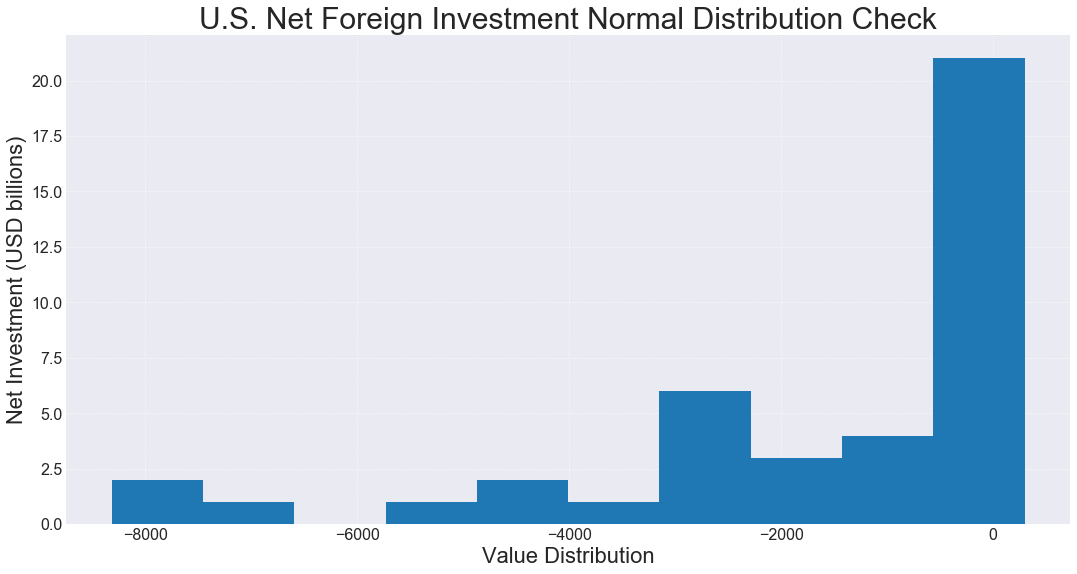

In [24]:
fig = plt.figure(figsize=(18, 9))
plt.hist(series_net_investment.values)
plt.title('U.S. Net Foreign Investment Normal Distribution Check').set_size(30)
plt.xlabel('Value Distribution').set_size(22)
plt.ylabel('Net Investment (USD billions)').set_size(22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.grid(linestyle='dotted')
plt.show()

Looking at the same data in a histogram, we see that it is heavily skewed.  Thus, performing analysis assuming normal distribution will not be useful.  It also confirms the high variance implied by the standard deviation and other statistical data provided in the above analysis.

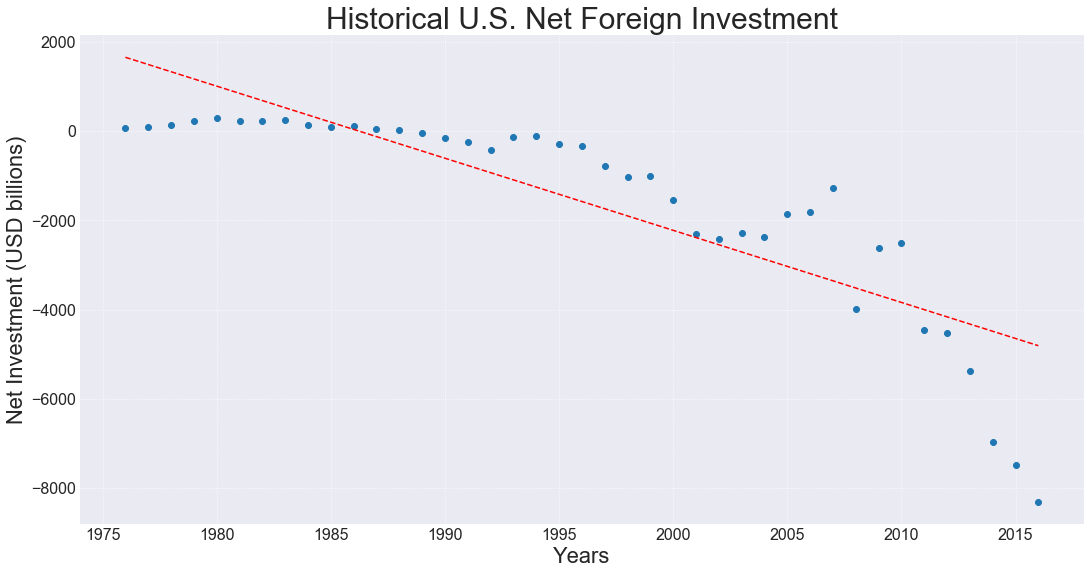

In [26]:
x = series_net_investment.index
y = series_net_investment.values

# plot the new values and index
fig = plt.figure(figsize=(18, 9))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Years').set_size(22)
plt.ylabel('Net Investment (USD billions)').set_size(22)
plt.title('Historical U.S. Net Foreign Investment').set_size(30)
plt.xticks(size=16)
plt.yticks(size=16)
plt.grid(linestyle='dotted')
plt.show()

This graph clearly shows that U.S. net internatinal investment has declined sharply over the last 40 years.  So, the answer to our question appears to be that U.S. net foreign investment trend has been a negative one, especially from 2000 to 2015.

__ #2: Did the Subprime Crisis impact these historical trends?__

To reach an answer to this question, we will compare the periods before and after the subprime crisis.  Specifically, we will compare 5 years before 2008 (2002-2007) to 5 years after 2008 (2009-2014).

In [34]:
series_net_investment[(series_net_investment.index > 2002) & (series_net_investment.index < 2008)]

2003   -2293.013
2004   -2363.392
2005   -1857.865
2006   -1808.474
2007   -1279.493
Name: U.S. net international investment position (line 4 less line 35), dtype: float64

In [41]:
before = series_net_investment[(series_net_investment.index > 2002) \
                               & (series_net_investment.index < 2008)].copy(deep=True)
after = series_net_investment[(series_net_investment.index > 2008)\
                              & (series_net_investment.index < 2015)].copy(deep=True)

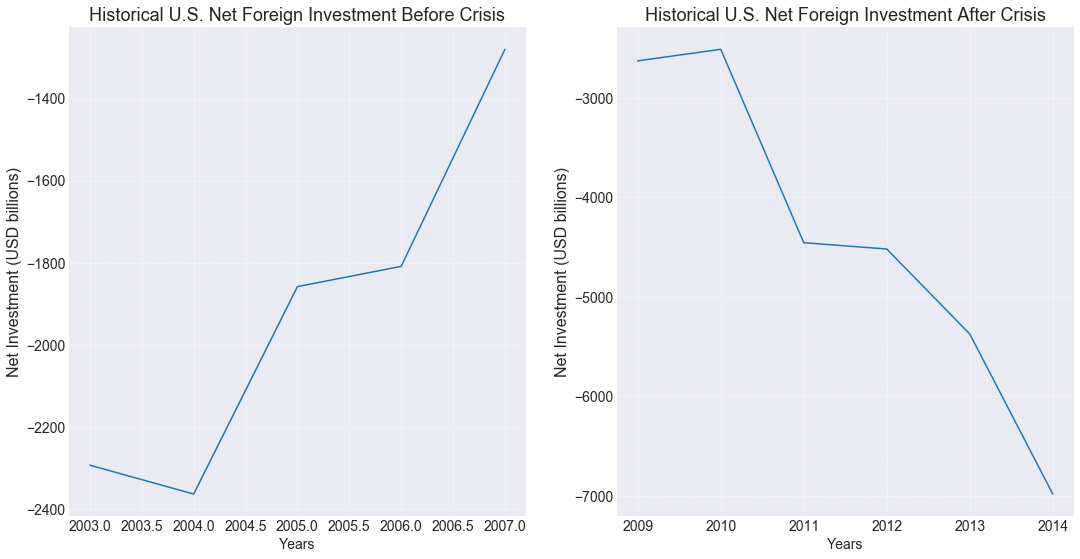

In [42]:
# plot the before and after crisis figures
fig = plt.figure(figsize=(18, 9)) 
plt.subplot(1, 2, 1)
plt.plot(before.index, before.values)
plt.grid(linestyle='dotted')
plt.title('Historical U.S. Net Foreign Investment Before Crisis').set_size(18)
plt.xlabel('Years').set_size(14)
plt.ylabel('Net Investment (USD billions)').set_size(16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(1, 2, 2)
plt.plot(after.index, after.values)
plt.grid(linestyle='dotted')
plt.title('Historical U.S. Net Foreign Investment After Crisis').set_size(18)
plt.xlabel('Years').set_size(14)
plt.ylabel('Net Investment (USD billions)').set_size(16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Our analysis appears to clearly answer the question. U.S. net foreign investment increased sharply in the 5 years prior to the crisis and declined rather dramatically in the 5 years after.  So, the Subprime Crisis had a negative affect on U.S. net foreign investment.

__ #3: What are some of the key drivers that led to the pre-and-post crisis changes?__

In [43]:
assets_before_after = series_assets[(series_assets.index > 2002) \
                               & (series_assets.index < 2014)].copy(deep=True)
liabs_before_after = series_liabilities[(series_liabilities.index > 2002) \
                               & (series_liabilities.index < 2014)].copy(deep=True)

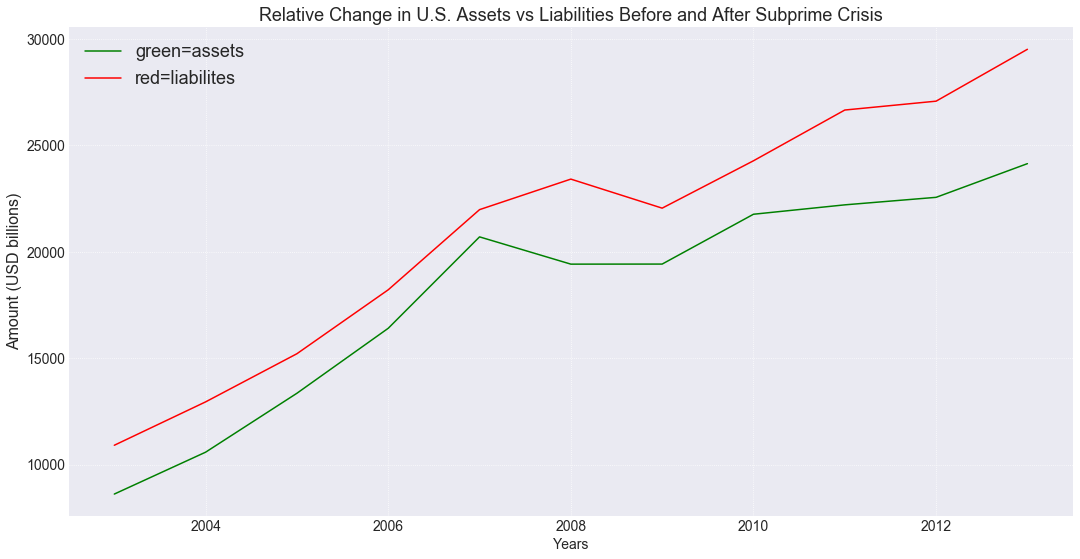

In [44]:
# plot the before and after crisis figures
fig = plt.figure(figsize=(18, 9))
plt.plot(assets_before_after.index, assets_before_after.values, 'g')
plt.plot(liabs_before_after.index, liabs_before_after.values, 'r')
plt.title('Relative Change in U.S. Assets vs Liabilities Before and After Subprime Crisis').set_size(18)
plt.xlabel('Years').set_size(14)
plt.ylabel('Amount (USD billions)').set_size(16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(linestyle='dotted')
plt.legend(['green=assets', 'red=liabilites'], loc='upper left', prop={'size': 18})
plt.show()

It appears clear that the key driver behind the change in U.S. foreign net investment before and after the Subprime Crisis is that following 2007 foreign liabilities began increasing faster than foreign assets.  Subtracting the more rapidly increasing liabilities from the assets, would give us the negative net investment trends we saw in our earlier analyses for question #1 and #2.

- - - -

## Proposed future research

After conducting the research for this Capstone, it is clear that significantly more analysis can be done to understand the impact of financial and other events on the U.S. and global economies.  Going forward, I would like to become proficient with, amoung others, the scikit-learn library and tools.  Specific to this assignment, I believe it would have allowed me to dive deeper into the analysis, merge multiple datasets to develop more complex questions, and, ultimately, develop models to predict the either the occurance of or results from events such as the Subprime Mortgage Crisis on various financial instruments.

With my background, this would be interesting because such insight could be used to avoid investment losses or produce investment gains.  I have thoroughly enjoyed this prep-course and, despite the tumuluous period under which I took it, am as committed as ever to becoming a knowledgeable, respected data scientist.

- - - -

**Supplemental Data**


https://www.bloomberg.com/news/articles/2017-08-31/canada-s-economy-surges-4-5-on-consumer-spending-key-takeaways

https://www.imf.org/en/News/Articles/2017/05/18/NA190517Latin-America-and-the-Caribbean-Bouncing-Back-from-Recession

http://www.globalissues.org/article/768/global-financial-crisis

https://www.investopedia.com/university/credit-crisis/credit-crisis6.asp

https://www.thebalance.com/stock-market-crash-of-2008-3305535

http://knowledge.wharton.upenn.edu/article/mortgage-crisis-bailout-relief-for-some-risk-for-others/

https://www.investopedia.com/terms/d/djia.asp

https://www.investopedia.com/terms/n/nasdaq100.asp,https://www.investopedia.com/ask/answers/040215/what-does-sp-500-index-measure-and-how-it-calculated.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186